In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [3]:
test= pd.read_csv("./Data For Project/test_data.csv")
test

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,51,1,0.0032,-0.0003,100.0,518.67,641.83,1583.55,1408.68,14.62,...,521.79,2387.99,8149.56,8.3884,0.03,391,2388,100.0,39.08,23.3214
1,51,2,-0.0011,-0.0002,100.0,518.67,642.09,1580.84,1397.69,14.62,...,522.13,2387.98,8145.73,8.3922,0.03,391,2388,100.0,38.83,23.3451
2,51,3,0.0008,-0.0004,100.0,518.67,642.49,1591.56,1398.40,14.62,...,522.27,2388.00,8142.38,8.4018,0.03,392,2388,100.0,39.18,23.3495
3,51,4,-0.0010,-0.0000,100.0,518.67,642.42,1573.22,1397.74,14.62,...,522.71,2387.99,8148.23,8.3900,0.03,393,2388,100.0,38.89,23.4847
4,51,5,0.0024,0.0003,100.0,518.67,642.08,1587.52,1388.02,14.62,...,522.14,2388.02,8147.25,8.4024,0.03,391,2388,100.0,39.05,23.4072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,100,116,0.0006,0.0000,100.0,518.67,642.36,1591.22,1407.75,14.62,...,521.41,2388.07,8145.15,8.4126,0.03,392,2388,100.0,39.05,23.3016
6408,100,117,0.0006,-0.0001,100.0,518.67,642.77,1590.85,1412.00,14.62,...,521.74,2388.13,8143.03,8.4345,0.03,394,2388,100.0,38.79,23.3007
6409,100,118,0.0018,-0.0002,100.0,518.67,642.21,1586.56,1405.31,14.62,...,521.33,2388.09,8139.82,8.4590,0.03,393,2388,100.0,38.81,23.2483
6410,100,119,0.0020,-0.0003,100.0,518.67,642.57,1588.46,1405.24,14.62,...,521.10,2388.07,8146.76,8.4512,0.03,394,2388,100.0,38.77,23.2437


In [4]:
test['Remaining_cycles'] = test.groupby('Engine id')['Cycle number'].transform("max") - test['Cycle number']
test.head()

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Remaining_cycles
0,51,1,0.0032,-0.0003,100.0,518.67,641.83,1583.55,1408.68,14.62,...,2387.99,8149.56,8.3884,0.03,391,2388,100.0,39.08,23.3214,126
1,51,2,-0.0011,-0.0002,100.0,518.67,642.09,1580.84,1397.69,14.62,...,2387.98,8145.73,8.3922,0.03,391,2388,100.0,38.83,23.3451,125
2,51,3,0.0008,-0.0004,100.0,518.67,642.49,1591.56,1398.40,14.62,...,2388.00,8142.38,8.4018,0.03,392,2388,100.0,39.18,23.3495,124
3,51,4,-0.0010,-0.0000,100.0,518.67,642.42,1573.22,1397.74,14.62,...,2387.99,8148.23,8.3900,0.03,393,2388,100.0,38.89,23.4847,123
4,51,5,0.0024,0.0003,100.0,518.67,642.08,1587.52,1388.02,14.62,...,2388.02,8147.25,8.4024,0.03,391,2388,100.0,39.05,23.4072,122


In [5]:
train = pd.read_csv("./Data For Project/train_data.csv")
train

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,50,194,0.0037,0.0004,100.0,518.67,643.77,1604.93,1423.51,14.62,...,519.85,2388.19,8194.20,8.5043,0.03,396,2388,100.0,38.42,23.0543
9905,50,195,0.0019,-0.0004,100.0,518.67,643.33,1605.31,1434.87,14.62,...,519.33,2388.21,8200.90,8.5352,0.03,395,2388,100.0,38.45,23.0191
9906,50,196,0.0020,-0.0002,100.0,518.67,643.32,1602.26,1430.01,14.62,...,519.88,2388.17,8194.10,8.5034,0.03,395,2388,100.0,38.45,23.0379
9907,50,197,-0.0026,-0.0001,100.0,518.67,643.73,1599.94,1432.87,14.62,...,519.48,2388.20,8194.64,8.5241,0.03,397,2388,100.0,38.52,23.0832


In [6]:
train['Remaining_cycles'] = train.groupby('Engine id')['Cycle number'].transform("max") - train['Cycle number']

In [7]:
train.head()

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Remaining_cycles
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [8]:
forecast = pd.read_csv("./Data For Project/RUL_forecast_length.csv")
forecast.head()

,Forecast Length,Engine id
0,86,51
1,86,52
2,78,53
3,103,54
4,78,55


In [9]:
train.columns

Index(['Engine id', 'Cycle number', 'Operation Condition 1',
       'Operation Condition 2', 'Operation Condition 3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Remaining_cycles'],
      dtype='object')

<Axes: >

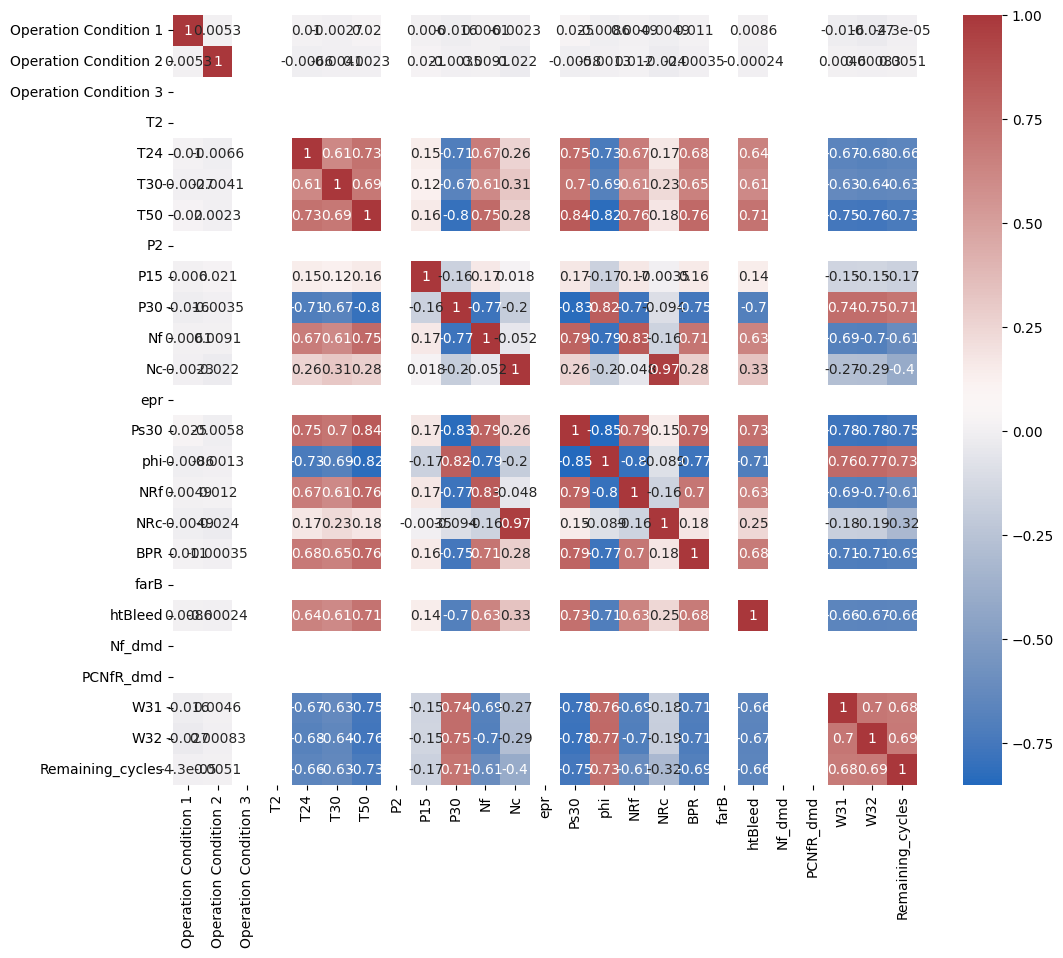

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(train.drop(columns=['Engine id','Cycle number']).corr(), 
            cmap='vlag', 
            annot=True
            )

In [11]:
# X_train=train.drop(columns=['Cycle number', 'Engine id', 'Remaining_cycles'])
X_train = train[['T24', 'T30', 'T50', 'P30', 'Nf', 'Ps30', 'phi', 'NRf', 'BPR', 'htBleed', 'W31', 'W32']]
y_train = train['Remaining_cycles']
# X_test=test.drop(columns=['Cycle number', 'Engine id', 'Remaining_cycles'])
X_test = test[['T24', 'T30', 'T50', 'P30', 'Nf', 'Ps30', 'phi', 'NRf', 'BPR', 'htBleed', 'W31', 'W32']]
y_test = test['Remaining_cycles']

<Axes: >

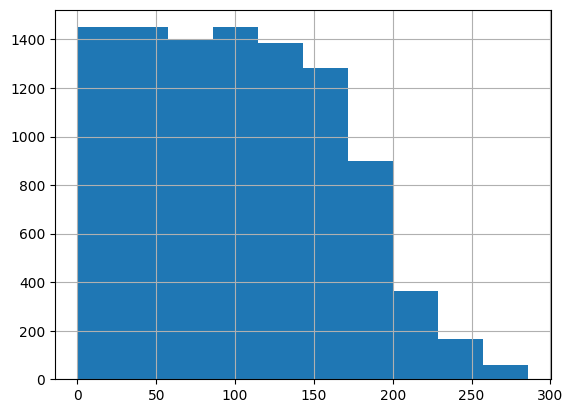

In [12]:
y_train.hist()

## Linear Regression

In [13]:
# SKlearn base model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [14]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)

In [15]:
metrics.mean_squared_error(y_test, y_pred)

5502.737363073543

In [16]:
metrics.mean_absolute_error(y_test, y_pred)

64.8666929101903

In [17]:
metrics.r2_score(y_test, y_pred)

-1.8114727383060405

In [18]:
metrics.mean_squared_log_error(y_test, y_pred)

1.6915783163785427

## Deep Neural Net: RNN Regressor

In [19]:
import tensorflow as tf
import keras
from keras import layers

In [20]:
model = tf.keras.Sequential([
    layers.SimpleRNN(units = 48, 
                        # activation = tf.nn.relu,
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)),
    layers.Dropout(0.2),
    layers.SimpleRNN(units = 48, 
                        # activation = tf.nn.relu,
                        return_sequences = True
                        ),
    layers.SimpleRNN(units = 48,
                        # activation = "relu",
                        # return_sequences = True
                        ),
    # layers.SimpleRNN(units = 50),
    layers.Dense(1, 
                #  activation=tf.nn.softmax
                 )
])

model.compile(optimizer= keras.optimizers.Adamax(learning_rate=0.0006), 
              loss='mean_squared_error')

# model.compile(optimizer = keras.optimizers.legacy.SGD(learning_rate=0.0005,
#                                 #   decay=1e-7, 
#                                 #   momentum=0.9, 
#                                 #   nesterov=False
#                                   ), 
#                   loss = "mean_squared_error")

In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), )

Epoch 1/10
310/310 [==============================] - 2s 3ms/step - loss: 12234.9092 - val_loss: 4797.7559
Epoch 2/10
310/310 [==============================] - 1s 3ms/step - loss: 10853.4453 - val_loss: 4074.4172
Epoch 3/10
310/310 [==============================] - 1s 3ms/step - loss: 9709.2500 - val_loss: 3491.6392
Epoch 4/10
310/310 [==============================] - 1s 2ms/step - loss: 8734.3926 - val_loss: 3020.9451
Epoch 5/10
310/310 [==============================] - 1s 2ms/step - loss: 7862.4507 - val_loss: 2626.8694
Epoch 6/10
310/310 [==============================] - 1s 2ms/step - loss: 7073.9795 - val_loss: 2337.0852
Epoch 7/10
310/310 [==============================] - 1s 2ms/step - loss: 6393.7285 - val_loss: 2128.2891
Epoch 8/10
310/310 [==============================] - 1s 2ms/step - loss: 5813.7637 - val_loss: 2008.8439
Epoch 9/10
310/310 [==============================] - 1s 2ms/step - loss: 5349.0566 - val_loss: 1960.1243
Epoch 10/10
310/310 [=======================

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 48)            2400      
                                                                 
 dropout (Dropout)           (None, 12, 48)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 12, 48)            4656      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 48)                4656      
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 11761 (45.94 KB)
Trainable params: 11761 (45.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## LSTM

In [23]:
lstm = tf.keras.Sequential([
    layers.LSTM(units=48, return_sequences=True, input_shape = (X_train.shape[1],1)),
    layers.LSTM(units=48, return_sequences=True, dropout=0.2, ),
    layers.LSTM(units=48, return_sequences=True, go_backwards=True, recurrent_dropout=0.2),
    # layers.LSTM(units=50),
    layers.Dense(1)
])
lstm.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.0006), loss='mean_squared_error')

In [24]:
lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), )

Epoch 1/10
310/310 [==============================] - 4s 9ms/step - loss: 12294.9102 - val_loss: 4728.4194
Epoch 2/10
310/310 [==============================] - 2s 7ms/step - loss: 10769.6982 - val_loss: 4048.3086
Epoch 3/10
310/310 [==============================] - 2s 7ms/step - loss: 9677.5947 - val_loss: 3478.0452
Epoch 4/10
310/310 [==============================] - 2s 7ms/step - loss: 8715.0449 - val_loss: 3015.4924
Epoch 5/10
310/310 [==============================] - 2s 7ms/step - loss: 7857.8643 - val_loss: 2631.4397
Epoch 6/10
310/310 [==============================] - 2s 7ms/step - loss: 7095.0879 - val_loss: 2354.9553
Epoch 7/10
310/310 [==============================] - 2s 8ms/step - loss: 6435.9062 - val_loss: 2156.7402
Epoch 8/10
310/310 [==============================] - 2s 8ms/step - loss: 5888.4189 - val_loss: 2040.6498
Epoch 9/10
310/310 [==============================] - 2s 7ms/step - loss: 5455.4956 - val_loss: 1983.9557
Epoch 10/10
310/310 [=======================

### CNN

In [25]:
cnn = tf.keras.Sequential([
    layers.Conv1D(filters=48,kernel_size=3,input_shape=(X_train.shape[1],1)),
    layers.MaxPooling1D(6),
    layers.Dense(48, activation='tanh'),
    layers.Dense(1)
])
cnn.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.0006), loss='mean_squared_error')

In [26]:
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),)

Epoch 1/10
310/310 [==============================] - 0s 703us/step - loss: 12406.2666 - val_loss: 4914.4521
Epoch 2/10
310/310 [==============================] - 0s 514us/step - loss: 11050.4961 - val_loss: 4195.1396
Epoch 3/10
310/310 [==============================] - 0s 510us/step - loss: 9901.2666 - val_loss: 3577.7280
Epoch 4/10
310/310 [==============================] - 0s 512us/step - loss: 8852.2607 - val_loss: 3056.8035
Epoch 5/10
310/310 [==============================] - 0s 515us/step - loss: 7926.6782 - val_loss: 2661.8755
Epoch 6/10
310/310 [==============================] - 0s 508us/step - loss: 7155.8857 - val_loss: 2365.1599
Epoch 7/10
310/310 [==============================] - 0s 508us/step - loss: 6492.9077 - val_loss: 2161.2212
Epoch 8/10
310/310 [==============================] - 0s 513us/step - loss: 5947.5576 - val_loss: 2035.7942
Epoch 9/10
310/310 [==============================] - 0s 507us/step - loss: 5473.2412 - val_loss: 1968.1549
Epoch 10/10
310/310 [=====